In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
anime = pd.read_csv('/content/anime.csv')
anime

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [3]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [4]:
set(anime['episodes'])

{'1',
 '10',
 '100',
 '1006',
 '101',
 '102',
 '103',
 '104',
 '105',
 '108',
 '109',
 '11',
 '110',
 '112',
 '113',
 '114',
 '115',
 '117',
 '119',
 '12',
 '120',
 '124',
 '125',
 '127',
 '1274',
 '128',
 '13',
 '130',
 '1306',
 '132',
 '136',
 '137',
 '14',
 '140',
 '141',
 '142',
 '1428',
 '143',
 '145',
 '147',
 '1471',
 '148',
 '15',
 '150',
 '151',
 '153',
 '154',
 '155',
 '156',
 '1565',
 '16',
 '161',
 '162',
 '163',
 '164',
 '167',
 '17',
 '170',
 '172',
 '175',
 '178',
 '1787',
 '18',
 '180',
 '1818',
 '182',
 '19',
 '191',
 '192',
 '193',
 '195',
 '199',
 '2',
 '20',
 '200',
 '201',
 '203',
 '21',
 '22',
 '220',
 '224',
 '225',
 '23',
 '237',
 '24',
 '240',
 '243',
 '25',
 '26',
 '260',
 '263',
 '27',
 '276',
 '28',
 '283',
 '29',
 '291',
 '296',
 '3',
 '30',
 '300',
 '305',
 '31',
 '312',
 '32',
 '33',
 '330',
 '331',
 '34',
 '35',
 '358',
 '36',
 '365',
 '366',
 '37',
 '373',
 '38',
 '39',
 '4',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '475',
 '48',
 '49',


In [5]:
anime['episodes'] = anime['episodes'].replace('Unknown', np.nan)
anime['episodes'] = anime['episodes'].astype(float)
anime['episodes'].fillna(anime['episodes'].median(), inplace=True)
anime['episodes'] = anime['episodes'].astype(int)
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  int64  
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 672.5+ KB


In [6]:
anime.isna().sum()

,0
anime_id,0
name,0
genre,62
type,25
episodes,0
rating,230
members,0


In [7]:
anime.isna().mean()*100

,0
anime_id,0.000000
name,0.000000
genre,0.504311
type,0.203351
episodes,0.000000
rating,1.870831
members,0.000000


In [8]:
anime.duplicated().sum()

0

In [9]:
anime['genre'].value_counts()

,count
genre,
Hentai,823
Comedy,523
Music,301
Kids,199
"Comedy, Slice of Life",179
...,...
"Adventure, Drama, Fantasy, Game, Sci-Fi",1
"Adventure, Demons, Fantasy, Historical",1
"Action, Comedy, Drama, Mecha, Music, Sci-Fi, Shounen",1


In [10]:
anime['type'].value_counts()

,count
type,
TV,3787
OVA,3311
Movie,2348
Special,1676
ONA,659
Music,488


In [11]:
anime['genre'] = anime['genre'].fillna(anime['genre'].mode()[0])
anime['type'] = anime['type'].fillna(anime['type'].mode()[0])
anime.isna().sum()

,0
anime_id,0
name,0
genre,0
type,0
episodes,0
rating,230
members,0


In [12]:
anime['rating'] = anime['rating'].fillna(anime['rating'].mean())
anime.isna().sum()

,0
anime_id,0
name,0
genre,0
type,0
episodes,0
rating,0
members,0


In [13]:
import plotly.express as px
education_counts = anime['type'].value_counts().reset_index()
education_counts.columns = ['type', 'Count']

# Create the plotly pie chart
fig = px.pie(education_counts, names='type', values='Count', title='Distribution of Type of Show',hole=.3)
fig.update_traces(textposition='inside',insidetextfont=dict(color='black'),textinfo='percent+label')
fig.show()

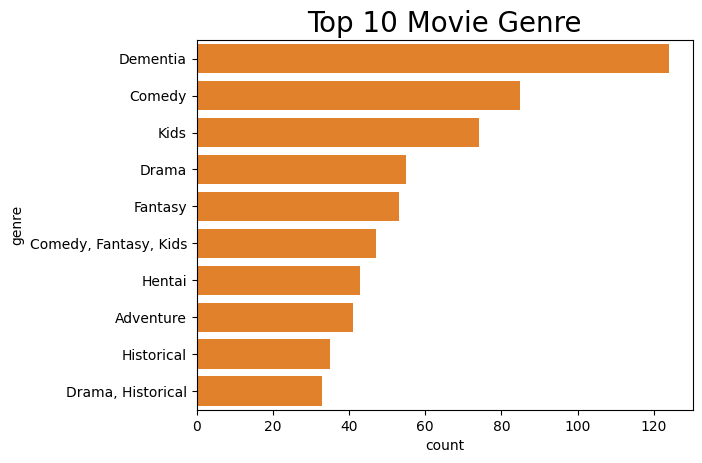

In [14]:
Top10_movies_directors = anime[anime['type'] == 'Movie']

base_color = sns.color_palette()[1]

sns.countplot(y = 'genre',color= base_color, data = Top10_movies_directors, order = Top10_movies_directors.genre.value_counts().head(10).index)

plt.title("Top 10 Movie Genre", fontsize = 20);

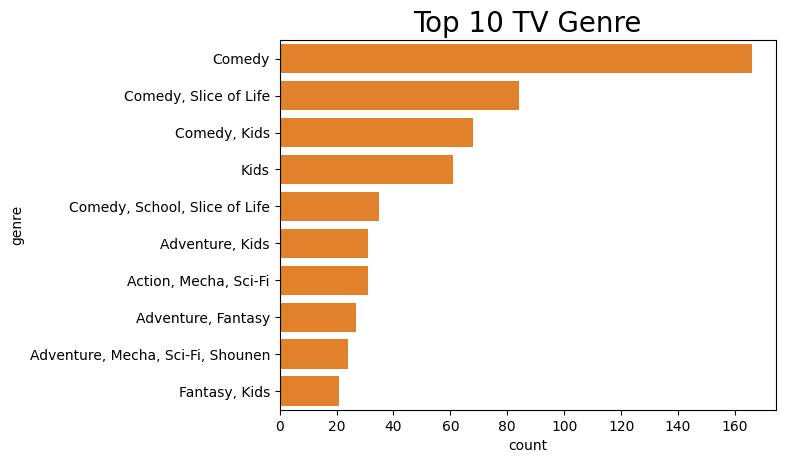

In [15]:
Top10_movies_directors = anime[anime['type'] == 'TV']

base_color = sns.color_palette()[1]

sns.countplot(y = 'genre',color= base_color, data = Top10_movies_directors, order = Top10_movies_directors.genre.value_counts().head(10).index)

plt.title("Top 10 TV Genre", fontsize = 20);

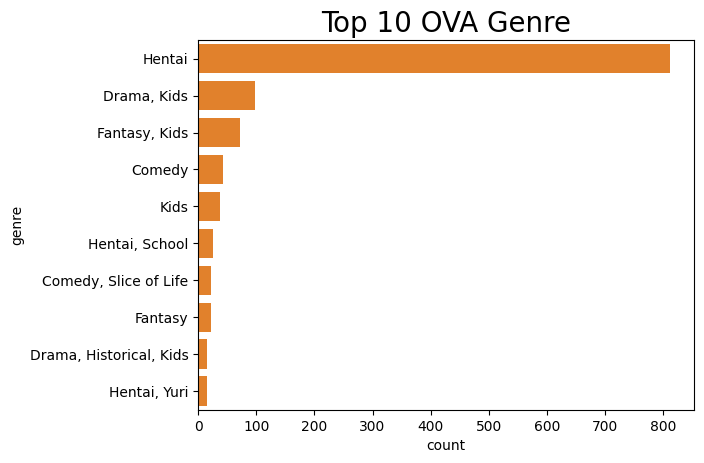

In [16]:
Top10_movies_directors = anime[anime['type'] == 'OVA']

base_color = sns.color_palette()[1]

sns.countplot(y = 'genre',color= base_color, data = Top10_movies_directors, order = Top10_movies_directors.genre.value_counts().head(10).index)

plt.title("Top 10 OVA Genre", fontsize = 20);

In [17]:
anime.groupby('genre')['rating'].mean().sort_values(ascending=False)

,rating
genre,
"Action, Adventure, Drama, Fantasy, Magic, Military, Shounen",9.26
"Drama, Fantasy, Romance, Slice of Life, Supernatural",9.06
"Drama, School, Shounen",9.05
"Adventure, Drama, Supernatural",8.93
"Drama, Music, Romance, School, Shounen",8.92
...,...
"Action, Demons, Seinen, Super Power",3.32
"Kids, Mecha",3.26
"Action, Adventure, Sci-Fi, Space, Super Power",3.25


In [18]:
anime.groupby('genre')['rating'].count().sort_values(ascending=False)

,rating
genre,
Hentai,885
Comedy,523
Music,301
Kids,199
"Comedy, Slice of Life",179
...,...
"Action, Comedy, Fantasy, Magic, Shoujo, Slice of Life",1
"Action, Comedy, Fantasy, Magic, Shounen",1
"Adventure, Super Power",1


# Features for Computing Similarity

In [19]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


**Genre:** This is a categorical feature that can be used to determine similarity based on shared genres.

**Type:** Whether the anime is a TV series, Movie, etc.

**Episodes:** The number of episodes can be a factor in similarity.

**Rating:** The average rating can be used to find similarly rated anime.

**Members:** The number of members can indicate popularity and can be used for similarity.

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
anime['genre'] = le.fit_transform(anime['genre'])
anime['type'] = le.fit_transform(anime['type'])
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,2686,0,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,161,5,64,9.26,793665
2,28977,Gintama°,534,5,51,9.25,114262
3,9253,Steins;Gate,3240,5,24,9.17,673572
4,9969,Gintama&#039;,534,5,51,9.16,151266


In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler

MinMaxScaler()

In [22]:
anime['members'] = scaler.fit_transform(anime[['members']])
anime['episodes'] = scaler.fit_transform(anime[['episodes']])
anime['rating'] = scaler.fit_transform(anime[['rating']])
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,2686,0,0.000000,0.924370,0.197872
1,5114,Fullmetal Alchemist: Brotherhood,161,5,0.034673,0.911164,0.782770
2,28977,Gintama°,534,5,0.027518,0.909964,0.112689
3,9253,Steins;Gate,3240,5,0.012658,0.900360,0.664325
4,9969,Gintama&#039;,534,5,0.027518,0.899160,0.149186


In [23]:
data = anime.pivot_table(index='anime_id',columns='name',values='rating')
data.head()

name,&quot;0&quot;,"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,&quot;Eiji&quot;,&quot;Eiyuu&quot; Kaitai,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,...,s.CRY.ed,vivi,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,Üks Uks,ēlDLIVE,◯
anime_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
data = data.fillna(0)
data.head()

name,&quot;0&quot;,"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,&quot;Eiji&quot;,&quot;Eiyuu&quot; Kaitai,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,...,s.CRY.ed,vivi,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,Üks Uks,ēlDLIVE,◯
anime_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
data.idxmax()

,0
name,
&quot;0&quot;,20707
"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",25627
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,7669
&quot;Bungaku Shoujo&quot; Memoire,8481
&quot;Bungaku Shoujo&quot; Movie,6408
...,...
xxxHOLiC Rou,6864
xxxHOLiC Shunmuki,4918
Üks Uks,29708


In [26]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = pd.DataFrame(cosine_similarity(anime[['genre','type','episodes','rating','members']],anime[['genre','type','episodes','rating','members']]))
cosine_sim

,0,1,2,3,4,5,6,7,8,9,...,12284,12285,12286,12287,12288,12289,12290,12291,12292,12293
0,1.000000,0.999493,0.999955,0.999999,0.999955,0.999996,0.999902,0.999999,0.999999,0.999955,...,0.999999,0.999999,0.999999,0.999999,0.999999,0.999999,0.999999,0.999999,0.999999,1.000000
1,0.999493,1.000000,0.999746,0.999540,0.999747,0.999575,0.999839,0.999527,0.999499,0.999746,...,0.999522,0.999529,0.999523,0.999522,0.999522,0.999522,0.999522,0.999523,0.999523,0.999491
2,0.999955,0.999746,1.000000,0.999968,1.000000,0.999977,0.999990,0.999965,0.999956,1.000000,...,0.999964,0.999966,0.999964,0.999964,0.999964,0.999964,0.999964,0.999964,0.999964,0.999955
3,0.999999,0.999540,0.999968,1.000000,0.999968,0.999999,0.999922,1.000000,0.999998,0.999968,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999999
4,0.999955,0.999747,1.000000,0.999968,1.000000,0.999977,0.999990,0.999965,0.999956,1.000000,...,0.999964,0.999966,0.999964,0.999964,0.999964,0.999964,0.999964,0.999964,0.999964,0.999955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,0.999999,0.999522,0.999964,1.000000,0.999964,0.999998,0.999915,1.000000,0.999998,0.999964,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999999
12290,0.999999,0.999522,0.999964,1.000000,0.999964,0.999998,0.999915,1.000000,0.999998,0.999964,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999999
12291,0.999999,0.999523,0.999964,1.000000,0.999964,0.999998,0.999915,1.000000,0.999998,0.999964,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999999
12292,0.999999,0.999523,0.999964,1.000000,0.999964,0.999998,0.999915,1.000000,0.999998,0.999964,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999999


In [27]:
from sklearn.metrics import pairwise_distances
pair_dist = pairwise_distances(data,metric='euclidean')
pair_dist = pd.DataFrame(pair_dist)
pair_dist

,0,1,2,3,4,5,6,7,8,9,...,12284,12285,12286,12287,12288,12289,12290,12291,12292,12293
0,0.000000,1.178768,1.172206,1.096970,1.074913,1.152777,1.160825,1.125942,1.165687,1.205422,...,1.034086,1.034086,1.034086,0.883111,1.034086,1.085848,0.983533,1.034086,1.034086,1.034086
1,1.178768,0.000000,1.135805,1.057983,1.035097,1.115743,1.124056,1.087994,1.129076,1.170055,...,0.992634,0.992634,0.992634,0.834189,0.992634,1.046448,0.939853,0.992634,0.992634,0.992634
2,1.172206,1.135805,0.000000,1.050668,1.027618,1.108808,1.117173,1.080882,1.122224,1.163444,...,0.984833,0.984833,0.984833,0.824892,0.984833,1.039051,0.931611,0.984833,0.984833,0.984833
3,1.096970,1.057983,1.050668,0.000000,0.940890,1.028947,1.037955,0.998789,1.043389,1.087602,...,0.893963,0.893963,0.893963,0.713948,0.893963,0.953363,0.834969,0.893963,0.893963,0.893963
4,1.074913,1.035097,1.027618,0.940890,0.000000,1.005399,1.014617,0.974513,1.020175,1.065352,...,0.866756,0.866756,0.866756,0.679571,0.866756,0.927900,0.805773,0.866756,0.866756,0.866756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,1.085848,1.046448,1.039051,0.953363,0.927900,1.017082,1.026194,0.986562,1.031690,1.076384,...,0.880281,0.880281,0.880281,0.696739,0.880281,0.000000,0.820303,0.880281,0.880281,0.880281
12290,0.983533,0.939853,0.931611,0.834969,0.805773,0.907043,0.917249,0.872683,0.923394,0.973074,...,0.750444,0.750444,0.750444,0.523179,0.750444,0.820303,0.000000,0.750444,0.750444,0.750444
12291,1.034086,0.992634,0.984833,0.893963,0.866756,0.961626,0.971259,0.929286,0.977064,1.024144,...,0.815575,0.815575,0.815575,0.612955,0.815575,0.880281,0.750444,0.000000,0.815575,0.815575
12292,1.034086,0.992634,0.984833,0.893963,0.866756,0.961626,0.971259,0.929286,0.977064,1.024144,...,0.815575,0.815575,0.815575,0.612955,0.815575,0.880281,0.750444,0.815575,0.000000,0.815575


In [28]:
def get_recommendations(anime_title,top_n=5, threshold=0.8):
    # Check if anime title exists before getting index
    if anime_title not in anime['name'].values:
        print(f"Anime title '{anime_title}' not found in the dataset.")
        return []  # Return an empty list if title not found

    anime_index = anime[anime['name'] == anime_title].index[0]
    sim_scores = list(enumerate(cosine_sim[anime_index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = [x for x in sim_scores if x[1] > threshold]
    # Convert top_n to an integer if it's not already
    top_n = int(top_n)
    sim_scores = sim_scores[1:top_n+1]
    anime_indices = [i[0] for i in sim_scores]
    return anime.iloc[anime_indices]['name'].tolist()

In [29]:
get_recommendations('Cowboy Bebop')

['R.O.D the TV',
 'Generator Gawl',
 'Urusei Yatsura: Haru da, Tobidase!',
 'Shaman King',
 'JoJo no Kimyou na Bouken: Diamond wa Kudakenai']

In [30]:
get_recommendations('Gintama&#039;', threshold=0.9)

['Gintama°',
 'Gintama&#039;: Enchousen',
 'Toshokan Sensou: Koi no Shougai',
 'Gall Force: The Revolution',
 'Choujikuu Seiki Orguss Memorial']

In [31]:
get_recommendations('Gintama&#039;', threshold=0.1)

['Gintama°',
 'Gintama&#039;: Enchousen',
 'Toshokan Sensou: Koi no Shougai',
 'Gall Force: The Revolution',
 'Choujikuu Seiki Orguss Memorial']

# Interview Questions:

**Can you explain the difference between user-based and item-based collaborative filtering?**

*  User-based collaborative filtering identifies users who have similar tastes or behavior to a target user and recommends items that those similar users have liked or interacted with.
* item based collaborative filtering focuses on finding similarities between items rather than users and then uses these similarities to recommend items to a user.

How It Works:

**What is collaborative filtering, and how does it work?**


Collaborative filtering is a technique used in recommendation systems to predict a user's preferences by analyzing patterns of behavior and preferences among a group of users.
It identifies similarities between users or items based on historical data such as user ratings, purchase history, or clicks.